# Random Forest

Slides: [link](https://docs.google.com/presentation/d/18KIHEHceqyeOGEOSPFZY-GWKGejYfztpqVruwCuf-QU/edit?usp=sharing)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn import metrics
#from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Breast Cancer Random Forest Classifier

In [4]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

In [5]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)

In [6]:
predictor=bc.drop(columns=['class'])
predictor.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [7]:
target.value_counts(normalize=True)

0    0.634446
1    0.365554
dtype: float64

In [8]:
# Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [9]:
# fit our model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,class_weight='balanced', n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [10]:
importances = rnd_clf.feature_importances_

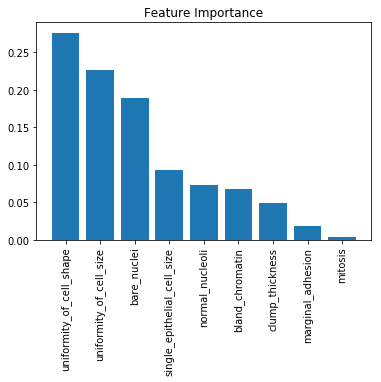

In [11]:
# creating list of column names
feat_names=list(X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [12]:
# Predictions for the test data
y_pred = rnd_clf.predict(X_test)

In [13]:
# Class Probailities
yprob = rnd_clf.predict_proba(X_test)
yprob
yprob[:5]

array([[0.99883759, 0.00116241],
       [0.33884094, 0.66115906],
       [0.99684162, 0.00315838],
       [0.0435297 , 0.9564703 ],
       [0.99864391, 0.00135609]])

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9532163742690059


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[97,  4],
       [ 4, 66]])

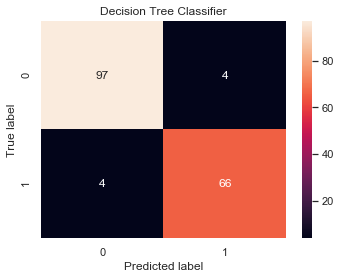

In [16]:
# Transform to df for easier plotting
import seaborn as sns; sns.set()

cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9428571428571428

# Grid Search

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [ ]:
# parameters we are interested in exploring
param_grid = [{'n_estimators': [4,6,7,10], 'max_features': [2, 4, 6, 8],  'max_leaf_nodes':[5,10,15,20],'class_weight':['balanced']},]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

In [ ]:
# Return the best parameters
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("f1 Score:",f1_score(y_test, y_pred))

## Class Work 
### Implement Gradient Boosting Classifier and Grid Seach
- Use favorite implementation
- Boosting Algorithms: [link](https://towardsdatascience.com/https-medium-com-talperetz24-mastering-the-new-generation-of-gradient-boosting-db04062a7ea2)

In [ ]:
#conda install py-xgboost

In [16]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

Parameters XGBOOST: [link](https://xgboost.readthedocs.io/en/latest/parameter.html)



In [1]:
param_grid = {"learning_rate": [0.1,0.01,.5],'max_depth': [1,5,10,20],'min_child_weight': [10],'subsample': [ 0.5],'n_estimators': [5, 30, 100, 250,1000],}

In [2]:
from sklearn.model_selection import GridSearchCV
xgb_clf= xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

NameError: name 'xgb' is not defined

In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("f1 Score:",f1_score(y_test, y_pred))

In [ ]:
!pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension